**Problem 2**

In [1]:
#Import packages
import pandas as mypd
import matplotlib.pyplot as myplot
import seaborn as mysb
import statsmodels.api as mysm
import numpy as mynp
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import math as mymath
import statistics as mystat

In [2]:
#Load data
mydata = mypd.read_excel('Heart_Disease_Data.xlsx')

In [3]:
#Explore the data
mydata.head(10)
mydata.tail(10)

,Age,Sex,CP,RestBP,Cholesteral,FBP,RestECG,Max_HR,ExAngina,Oldpeak,Slope,CA,Thal,Result
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
#Check the structure of the data
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          303 non-null    int64  
 1   Sex          303 non-null    int64  
 2   CP           303 non-null    int64  
 3   RestBP       303 non-null    int64  
 4   Cholesteral  303 non-null    int64  
 5   FBP          303 non-null    int64  
 6   RestECG      303 non-null    int64  
 7   Max_HR       303 non-null    int64  
 8   ExAngina     303 non-null    int64  
 9   Oldpeak      303 non-null    float64
 10  Slope        303 non-null    int64  
 11  CA           303 non-null    int64  
 12  Thal         303 non-null    int64  
 13  Result       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


We find that there are total 303 entries in the dataset and there is no missing value present.

There are 13 expalnatory features in the data. 

All the features are numeric type. Some of the features are ordinal type discrete numeric data. 

Apparently 

In [5]:
#List of features
mydata.columns

Index(['Age', 'Sex', 'CP', 'RestBP', 'Cholesteral', 'FBP', 'RestECG', 'Max_HR',
       'ExAngina', 'Oldpeak', 'Slope', 'CA', 'Thal', 'Result'],
      dtype='object')

**Separate the Variables**

In [6]:
#Continuos variables
Age = mydata.Age
RestBP = mydata.RestBP
Cholesteral = mydata.Cholesteral
Max_HR = mydata.Max_HR
Oldpeak = mydata.Oldpeak

In [7]:
#Categorical Variables
Sex = mydata.Sex
CP = mydata.CP
FBP = mydata.FBP
RestECG = mydata.RestECG
ExAngina = mydata.ExAngina
CA = mydata.CA
Thal = mydata.Thal
Slope = mydata.Slope

**Descriptive summary of the continuous features**

In [8]:
#Descriptive summary of the features
mydata[['Age','RestBP', 'Cholesteral','Max_HR',
        'Oldpeak']].describe()

,Age,RestBP,Cholesteral,Max_HR,Oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


## Graphical Visualization of the continuous variables

**Age**

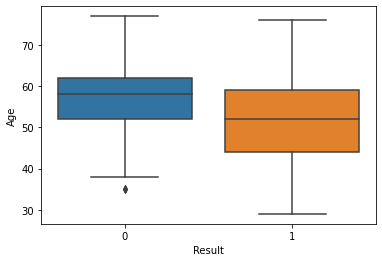

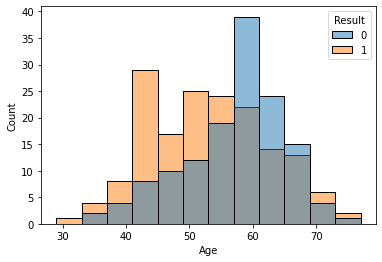

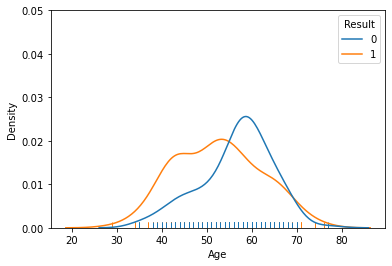

In [9]:
#Box plot
mysb.boxplot(x=mydata.Result,y=Age,data=mydata)
myplot.show()
#Histogram
mysb.histplot(data=mydata,x=Age,hue=mydata.Result)
myplot.show()
#Rug plot and KDE plot
mysb.rugplot(x=Age,hue=mydata.Result)
mysb.kdeplot(x=Age,hue=mydata.Result)
myplot.ylim(0,0.05)
myplot.show()


So, going by the knowledge that in general heart disease happens more at a later age, we see that 0 = Heart Disease, 1 = Not heart Disease

**RestBP**

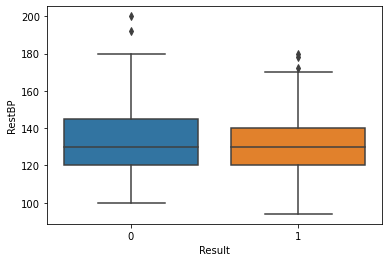

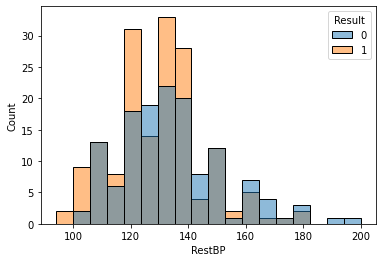

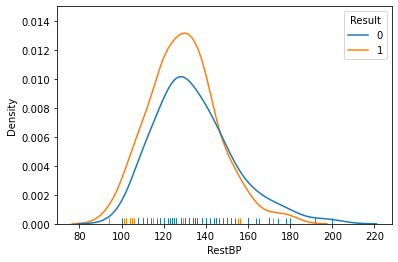

In [10]:
#Box plot
mysb.boxplot(x=mydata.Result,y=RestBP,data=mydata)
myplot.show()
#Histogram
mysb.histplot(data=mydata,x=RestBP,hue=mydata.Result)
myplot.show()
#Rug plot and KDE plot
mysb.rugplot(x=RestBP,hue=mydata.Result)
mysb.kdeplot(x=RestBP,hue=mydata.Result)
myplot.ylim(0,0.015)
myplot.show()

**Cholesteral**

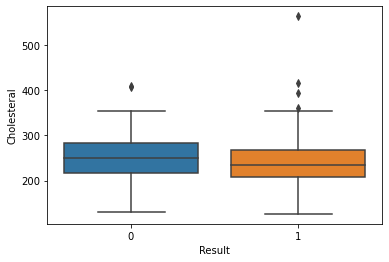

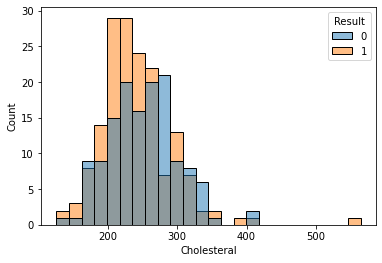

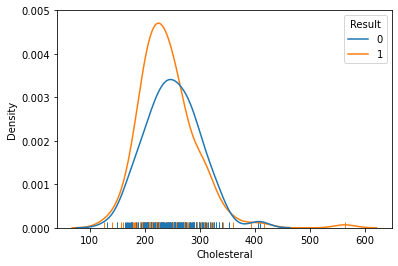

In [11]:
#Box plot
mysb.boxplot(x=mydata.Result,y=Cholesteral,data=mydata)
myplot.show()
#Histogram
mysb.histplot(data=mydata,x=Cholesteral,hue=mydata.Result)
myplot.show()
#Rug plot and KDE plot
mysb.rugplot(x=Cholesteral,hue=mydata.Result)
mysb.kdeplot(x=Cholesteral,hue=mydata.Result)
myplot.ylim(0,0.005)
myplot.show()

**Max_HR**

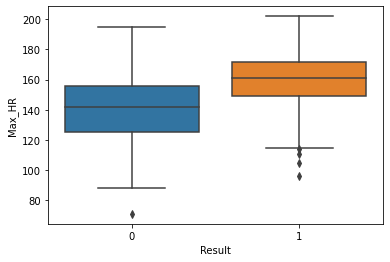

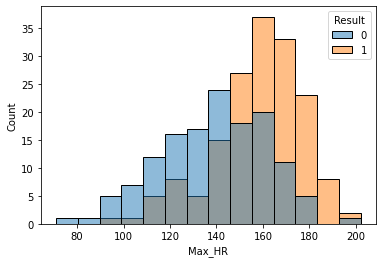

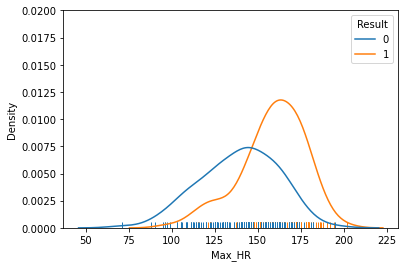

In [12]:
#Box plot
mysb.boxplot(x=mydata.Result,y=Max_HR,data=mydata)
myplot.show()
#Histogram
mysb.histplot(data=mydata,x=Max_HR,hue=mydata.Result)
myplot.show()
#Rug plot and KDE plot
mysb.rugplot(x=Max_HR,hue=mydata.Result)
mysb.kdeplot(x=Max_HR,hue=mydata.Result)
myplot.ylim(0,0.02)
myplot.show()


**Oldpeak**

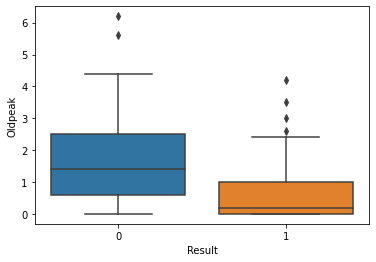

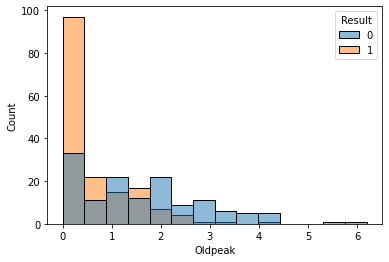

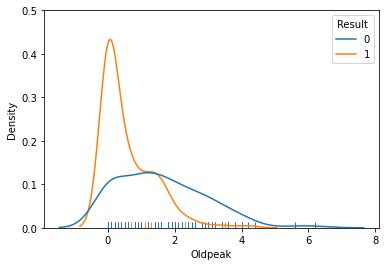

In [13]:
#Box plot
mysb.boxplot(x=mydata.Result,y=Oldpeak,data=mydata)
myplot.show()
#Histogram
mysb.histplot(data=mydata,x=Oldpeak,hue=mydata.Result)
myplot.show()
#Rug plot and KDE plot
mysb.rugplot(x=Oldpeak,hue=mydata.Result)
mysb.kdeplot(x=Oldpeak,hue=mydata.Result)
myplot.ylim(0,0.5)
myplot.show()


## Graphical Visualization of the categorical variables

**Sex**

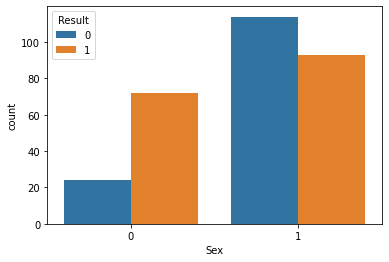

In [14]:
#count plot
mysb.countplot(x=Sex,hue=mydata.Result,data=mydata)
myplot.show()

In [15]:
categorical_features = [Sex, CP, FBP, RestECG,
       ExAngina, Slope, CA, Thal]

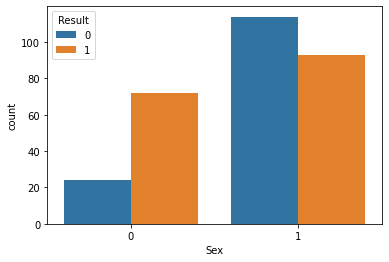

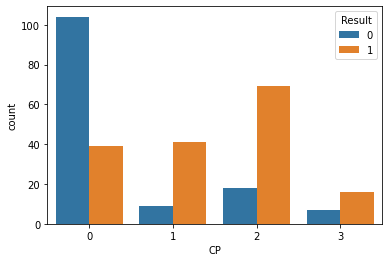

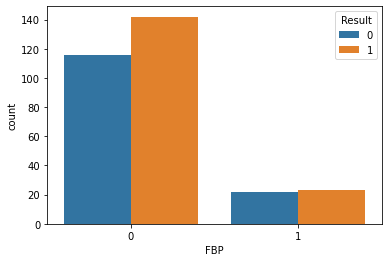

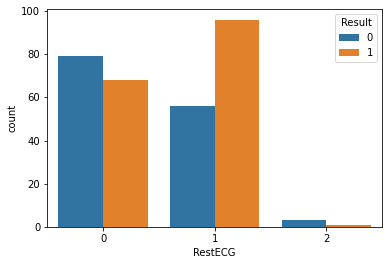

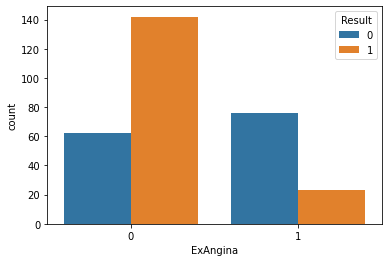

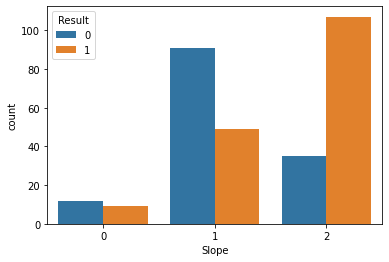

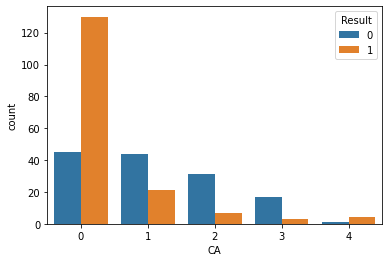

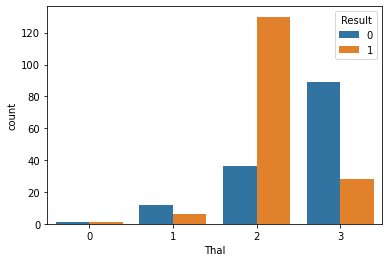

In [16]:
for i in categorical_features:
    mysb.countplot(x=i,hue=mydata.Result,data=mydata)
    myplot.show()

## Logistic Regression Model

In [17]:
#We separate x's and y
x = mydata.iloc[:,0:13]
y = mydata.iloc[:,13]
#We put another column: Intercept
x['Intercept'] = 1

**Develop the Initial Model**

In [18]:
#Develop binary logistic regression model
mymodel = mysm.Logit(endog=y,exog=x).fit()

Optimization terminated successfully.
         Current function value: 0.348904
         Iterations 7


In [19]:
#Summary output
mymodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Result   No. Observations:                  303
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                           13
Date:                Sun, 24 Apr 2022   Pseudo R-squ.:                  0.4937
Time:                        10:53:38   Log-Likelihood:                -105.72
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 7.262e-37
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age            -0.0049      0.023     -0.212      0.832      -0.050       0.041
Sex            -1.7582      0.469     -3.751      0.000      -2.677      -0.839
CP              0.8599      0.185      4.638      0.000       0.496       1.223
RestBP         -0.0195      0.010     -1.884      0.060      -0.040       0.001
Cholesteral    -0.0046      0.004     -1.224      0.221      -0.012       0.003
FBP             0.0349      0.529      0.066      0.947      -1.003       1.073
RestECG         0.4663      0.348      1.339      0.181      -0.216       1.149
Max_HR          0.0232      0.010      2.219      0.026       0.003       0.044
ExAngina       -0.9800      0.410     -2.391      0.017      -1.783      -0.177
Oldpeak        -0.5403      0.214     -2.526      0.012      -0.959      -0.121
Slope           0.5793      0.350      1.656      0.098      -0.106       1.265
CA             -0.7733      0.191     -4.051      0.000      -1.147      -0.399
Thal           -0.9004      0.290     -3.104      0.002      -1.469      -0.332
Intercept       3.4505      2.571      1.342      0.180      -1.590       8.490
===============================================================================
"""

In the model we see that the variables: Age, RestBP, Cholesteral, Slope, FBP, RestECG are not significant features.

Only Sex, CP,CA,Thal,Max_HR,ExAngina,Oldpeak are significant.

We develop new model using only these variables: Sex, CP,CA,Thal,Max_HR,ExAngina,Oldpeak

In [20]:
#Overwrite x's
x= mydata.iloc[:,[1,2,7,8,9,11,12]]
x['Intercept'] = 1

<ipython-input-20-722d76677047>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Intercept'] = 1


**Use this method**

x.loc[:,'Intercept'] = 1


In [21]:
#Develop the new binary logistic model
mymodel = mysm.Logit(endog=y,exog=x).fit()

Optimization terminated successfully.
         Current function value: 0.368502
         Iterations 7


In [22]:
#Check the model
mymodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Result   No. Observations:                  303
Model:                          Logit   Df Residuals:                      295
Method:                           MLE   Df Model:                            7
Date:                Sun, 24 Apr 2022   Pseudo R-squ.:                  0.4653
Time:                        10:53:38   Log-Likelihood:                -111.66
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 1.824e-38
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Sex           -1.3896      0.406     -3.425      0.001      -2.185      -0.594
CP             0.7872      0.175      4.505      0.000       0.445       1.130
Max_HR         0.0237      0.009      2.685      0.007       0.006       0.041
ExAngina      -1.0447      0.389     -2.686      0.007      -1.807      -0.282
Oldpeak       -0.7406      0.182     -4.061      0.000      -1.098      -0.383
CA            -0.7133      0.174     -4.090      0.000      -1.055      -0.372
Thal          -0.8963      0.275     -3.265      0.001      -1.434      -0.358
Intercept      0.4636      1.482      0.313      0.754      -2.440       3.367
==============================================================================
"""

**Expression of the Model**

z = exp(y)/1+exp(y)

where 

y = 0.4636 -1.3896*Sex + 0.7872*CP - 0.7133*CA - 0.8963*Thal + 0.0237*Max_HR - 1.0447*ExAngina - 0.7406*Oldpeak

**Model Significance**


Test statistics = Log-likelihood
p value for log-likelihood ratio is <0.05.

So, the model is significant and it is better than the null model.

**Model accuracy**

Pseudo R<sup>2</sup> > 0.6 to say that the model is reasonably accurate

Here pseudo R2 value is 0.4653. So, the model is not reasonably accurate.

**Confusion Matrix**

In [23]:
#Predicted Value
predy = mymodel.predict()
mynp.round(predy,3)

array([0.916, 0.666, 0.924, 0.844, 0.739, 0.8  , 0.892, 0.78 , 0.806,
       0.857, 0.545, 0.967, 0.842, 0.662, 0.984, 0.943, 0.987, 0.859,
       0.554, 0.864, 0.456, 0.852, 0.817, 0.578, 0.706, 0.828, 0.8  ,
       0.79 , 0.934, 0.827, 0.938, 0.355, 0.925, 0.797, 0.452, 0.875,
       0.986, 0.664, 0.959, 0.962, 0.856, 0.898, 0.077, 0.853, 0.959,
       0.88 , 0.958, 0.927, 0.992, 0.921, 0.968, 0.636, 0.113, 0.981,
       0.987, 0.623, 0.843, 0.84 , 0.977, 0.848, 0.931, 0.704, 0.994,
       0.89 , 0.941, 0.874, 0.576, 0.959, 0.89 , 0.926, 0.758, 0.462,
       0.945, 0.654, 0.982, 0.903, 0.732, 0.712, 0.919, 0.529, 0.957,
       0.89 , 0.965, 0.888, 0.753, 0.876, 0.52 , 0.704, 0.943, 0.694,
       0.828, 0.335, 0.5  , 0.812, 0.938, 0.116, 0.817, 0.087, 0.639,
       0.692, 0.862, 0.282, 0.906, 0.876, 0.938, 0.865, 0.876, 0.746,
       0.923, 0.919, 0.781, 0.767, 0.913, 0.549, 0.85 , 0.986, 0.794,
       0.764, 0.971, 0.773, 0.206, 0.83 , 0.963, 0.985, 0.989, 0.97 ,
       0.644, 0.973,

In [24]:
#Predicted class
predclass = [1 if i>0.5 else 0 for i in predy]

In [25]:
#Create dataframe for predy and predclass
predy = mypd.DataFrame(predy,columns=['Probability'])
predclass = mypd.DataFrame(predclass,columns=['Predicted_Class'])

In [26]:
#Create the confusion matrix
mytable = mypd.crosstab(index=mydata.Result,columns=predclass['Predicted_Class'])
mytable

Predicted_Class,0,1
Result,,
0,106,32
1,15,150


**Analysing Confusion Matrix**

| | Predicted |  |
| ----------- | ----------- | ----------- |
| Actual|  0|1|
|0 |TN |FP |
|1 | FN |TP |


0 : Negative
1 : Positive

Sensitivity or Recall

Sensitivity = TP/ (TP +FN)

Specificity

Specificity = TN/(TN+FP)

Precision

Precision = TP/(TP+FP)

F Measure

F Measure = Harmonic Mean of Precision and Recall

In [1]:
#True Positive
TP = 150
#False Positive
FP = 32
#True Negative
TN = 106
#False Negative
FN = 15

In [28]:
#Precision 
Precision = TP/(TP+FP)
round(Precision,2)

0.82

In [29]:
#Recall
Recall = TP/(TP+FN)
round(Recall,2)

0.91

In [30]:
#Specificity
Specificity = TN/(TN+FP)
round(Specificity,2)

0.77

In [31]:
#F-score
F_score = mystat.harmonic_mean([Precision,Recall])
round(F_score,3)

0.865

In [32]:
#Accuarcy
Accuracy = (TP + TN)/(TP+TN+FP+FN)
round(Accuracy,3)

0.845

**Model Generalizability (SkLearn Package)**

In [33]:
#Develop the same model in sklearn
sk_mymodel = LogisticRegression(C = 1e08)

For Regularization, we have taken C as high as possible.

In [34]:
#Fit the model to the data
sk_mymodel = sk_mymodel.fit(X=x,y=y)

/Users/sudiptarakshit/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# Check the model coefficients
sk_mymodel.coef_

array([[-1.414036  ,  0.79394732,  0.02420056, -0.99219224, -0.74163988,
        -0.71120049, -0.89369064,  0.18567104]])

In [36]:
# Model Generalizability: Cross validation
myscore = cross_val_score(estimator=sk_mymodel,X=x,y=y,scoring='accuracy',cv=10)

/Users/sudiptarakshit/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sudiptarakshit/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

In [37]:
cv_accuarcy = myscore.mean()
round(cv_accuarcy,3)

0.828

From confusion matrix, model accuracy was 0.845, after 10 fold cross validation, myscore.mean() i.e mean model accuracy decreased to 0.828 which is generalized model accuracy. 

This is an allowable decrease. 

